In [68]:
import numpy as np
import scipy.stats as sts
from scipy.stats import norm 
import math
from sympy import *
import pandas as pd

In [53]:
S0 = 350
K = 300
z = 21
T = z/365
r = 0.1
sigma = 0.3
e = 2.71828
t = 0

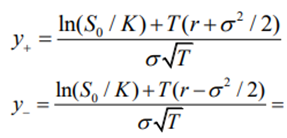

In [31]:
d1 = (np.log(S0/K) + T * (r+sigma**2/2))/(sigma*np.sqrt(T))
d2 = (np.log(S0/K) + T*(r-sigma**2/2))/(sigma*np.sqrt(T))
print(d1, d2)

2.2581385040609008 2.18617961168629


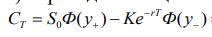

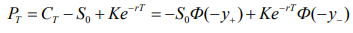

In [32]:
Ct = S0 * norm.cdf(d1) - K * e **(-r*T) * norm.cdf(d2)
Pt = Ct - S0 + K * e**(-r*T)
print('колл опцион', Ct, '\n пут опцион', Pt)

колл опцион 51.82767551479395 
 пут опцион 0.10660504740144461


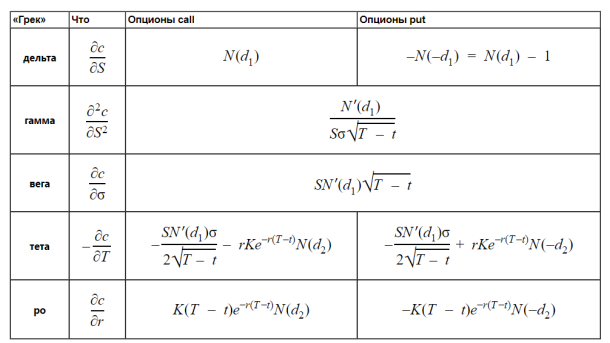

In [59]:
delta_call = norm.cdf(d1)
delta_put = norm.cdf(d2)
print('Дельта: ', delta_call, delta_put)

0.9880314871187036 0.9855987663540758


In [65]:
teta_call = (-S0*sts.norm.pdf(d1)*sigma)/(2*np.sqrt(T-t)) - r*K*e**(-r*(T-t))*delta_put
teta_put = (-S0*sts.norm.pdf(d1)*sigma)/(2*np.sqrt(T-t)) + r*K*e**(-r*(T-t))*norm.cdf(-d2)
print('Тета: ', teta_call, teta_put)

Тета:  -36.21907021556974 -6.391177262308987


In [66]:
vega = S0 * sts.norm.pdf(d1) * np.sqrt(T-t)
print('Вега = ', vega)

Вега =  2.6161726041239217


In [67]:
ro_call = K *(T - t) * e**(-r*(T-t))*norm.cdf(d2)
ro_put = - K *(T - t) * e**(-r*(T-t))*norm.cdf(-d2)
print('ro_call = ', ro_call, '\n ro_put = ', ro_put)

ro_call =  16.914110258936432 
 ro_put =  -0.24714322102180805


In [77]:
gamma = (sts.norm.pdf(d1)) / (S0 * sigma * np.sqrt(T-t))
print('gamma = ', gamma)

gamma =  0.0012373216721804099


In [79]:
data = {'грек':  ['teta', 'delta', 'gamma', 'vega', 'ro'], 
        'опционы call': [teta_call, delta_call, gamma, vega, ro_call], 
        'опционы put': [teta_put, delta_put, gamma, vega, ro_put]}

df = pd.DataFrame(data)
df

,грек,опционы call,опционы put
0,teta,-36.219070,-6.391177
1,delta,0.988031,0.985599
2,gamma,0.001237,0.001237
3,vega,2.616173,2.616173
4,ro,16.914110,-0.247143
